###  This notebook reads in the Charlottesville area CSV files and prepares a single data set for the ML routines
The files contain Cville area weather stations data from 1998 to 2018 and the pollen data from 1988 to 2018 to generate a file with 
"weather features" and the "target" of total pollen

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters
%matplotlib inline

In [3]:
# Import Pollen csv file
df = pd.read_csv('pollen_Richmond_30yr.csv', index_col=['Date'], parse_dates=['Date'])
# df = pd.read_csv('pollen_Richmond_30yr.csv')
df.columns

Index(['Tree', 'Mold', 'Grass', 'Ragweed'], dtype='object')

In [5]:
print(f"{df.head()}")

            Tree  Mold  Grass  Ragweed
Date                                  
1988-03-15  10.0   0.0    0.0      0.0
1988-03-16   0.0   0.0    0.0      0.0
1988-03-17   2.0   0.0    0.0      0.0
1988-03-18   2.0   0.0    0.0      0.0
1988-03-22   2.0   0.0    0.0      0.0


In [6]:
df.describe()

,Tree,Mold,Grass,Ragweed
count,5497.000000,5497.000000,5497.000000,5496.000000
mean,121.192703,3341.025105,3.451646,2.846234
std,402.350849,3093.422566,15.711649,11.252678
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,720.000000,0.000000,0.000000
50%,0.000000,2610.000000,0.000000,0.000000
75%,26.000000,5040.000000,0.000000,0.000000
max,5200.000000,27900.000000,497.000000,208.000000


In [7]:
df.count()

Tree       5497
Mold       5497
Grass      5497
Ragweed    5496
dtype: int64

In [8]:
print(df.dtypes)

Tree       float64
Mold       float64
Grass      float64
Ragweed    float64
dtype: object


In [9]:
dtg = pd.to_datetime(df.index)
print(dtg[0:5])

DatetimeIndex(['1988-03-15', '1988-03-16', '1988-03-17', '1988-03-18',
               '1988-03-22'],
              dtype='datetime64[ns]', name='Date', freq=None)


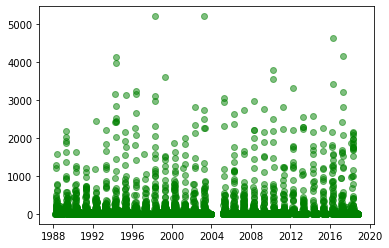

In [11]:
# Add the pollen types together for a "total pollen count".  Exclude mold spores at this time.
total_pollen = df["Tree"] + df["Grass"] + df["Ragweed"]
plt.scatter(dtg, total_pollen, c="g", alpha=0.5, marker='o')
plt.show()

In [12]:
# Add the total pollen count to the DataFrame
df["total-pol"] = total_pollen
df.columns

Index(['Tree', 'Mold', 'Grass', 'Ragweed', 'total-pol'], dtype='object')

y_values max is: 5200.0
y_values max is: 27900.0
y_values max is: 497.0
y_values max is: 208.0


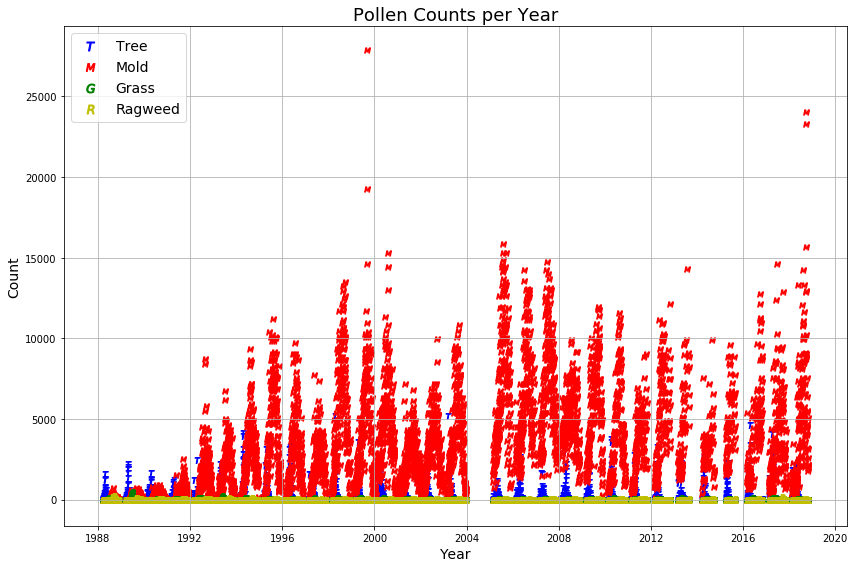

In [13]:
# Initialize the plotting parameters for the graph of each allergen

plt.figure(figsize=(12,8))
plt.title('Pollen Counts per Year', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid()

# # Make our own markers using first letter of each drug
# # enclosed in dollar signs to indicate a string

markers = ["$T$", "$M$", "$G$", "$R$"]
mkr = 0

colors = ['b','r','g','y']

# Compute the xvalues and yvalues as (timeindex, column values by column name)

#print(xval)

colnames = df.columns

# print(f"{colnames[0]}")


for a in colnames[0:4]:
    x_values = dtg
    y_values = df[a]
    print(f"y_values max is: {y_values.max()}")

    plt.scatter(x_values, y_values,
                 marker = markers[mkr], color=colors[mkr])
    mkr = mkr + 1
    
leg = plt.legend(colnames, markerscale=1.5, fontsize=14) 


# Save the Figure
plt.tight_layout()
# plt.savefig("./test.pdf")

plt.show()

In [14]:
# Need to match time intervals to the shortest length of record (Weather data starts at 1998)
df_1998 = df[df.index > "1997-12-31"]
dfdtg_1998 = pd.to_datetime(df_1998.index)

print(len(df_1998))

3565


In [15]:
df_1998.tail()

,Tree,Mold,Grass,Ragweed,total-pol
Date,,,,,
2018-10-29,0.0,1960.0,0.0,0.0,0.0
2018-10-30,0.0,2070.0,0.0,0.0,0.0
2018-10-31,0.0,2120.0,0.0,0.0,0.0
2018-11-01,0.0,2160.0,0.0,0.0,0.0
2018-11-02,0.0,1785.0,0.0,0.0,0.0


In [16]:
# Import Richmond area csv file for weather at local weather stations

df2 = pd.read_csv('Wx_Danville_data.csv', index_col=['DATE'], parse_dates=['DATE'])
df2.columns

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'AWND', 'DAPR',
       'MDPR', 'PRCP', 'TAVG', 'TMAX', 'TMIN', 'TOBS'],
      dtype='object')

In [17]:
print(f"{df2.head()}")

                STATION                   NAME   LATITUDE  LONGITUDE  \
DATE                                                                   
2013-07-01  US1VAPT0010  CHATHAM 5.9 SW, VA US  36.751176 -79.463467   
2013-07-02  US1VAPT0010  CHATHAM 5.9 SW, VA US  36.751176 -79.463467   
2013-07-03  US1VAPT0010  CHATHAM 5.9 SW, VA US  36.751176 -79.463467   
2013-07-05  US1VAPT0010  CHATHAM 5.9 SW, VA US  36.751176 -79.463467   
2013-07-08  US1VAPT0010  CHATHAM 5.9 SW, VA US  36.751176 -79.463467   

            ELEVATION  AWND  DAPR  MDPR  PRCP  TAVG  TMAX  TMIN  TOBS  
DATE                                                                   
2013-07-01      247.8   NaN   NaN   NaN  0.25   NaN   NaN   NaN   NaN  
2013-07-02      247.8   NaN   NaN   NaN  0.10   NaN   NaN   NaN   NaN  
2013-07-03      247.8   NaN   NaN   NaN  0.27   NaN   NaN   NaN   NaN  
2013-07-05      247.8   NaN   NaN   NaN  0.00   NaN   NaN   NaN   NaN  
2013-07-08      247.8   NaN   3.0  0.97   NaN   NaN   NaN   NaN

In [18]:
df2.count()

STATION      26520
NAME         26520
LATITUDE     26520
LONGITUDE    26520
ELEVATION    26520
AWND          6705
DAPR            53
MDPR            51
PRCP         19777
TAVG          7562
TMAX         17869
TMIN         17867
TOBS          5412
dtype: int64

In [19]:
dtg2 = pd.to_datetime(df2.index)

20.0


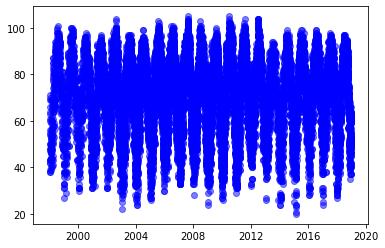

In [20]:
print(df2.TMAX.min())
plt.scatter(dtg2, df2.TMAX, c="b", alpha=0.5, marker='o')
plt.show()

In [21]:
rows = len(df2)
print(rows)

26520


### There are many incomplete records. 
Only keep rows where there is a TMAX and TMIN, so that TAVG can be computed in each cell and we drop most incomplete
records

In [22]:
df2_reduced = df2[df2.TMAX > 0]
dtg2_reduced = pd.to_datetime(df2_reduced.index)
print(len(df2_reduced))

17869


In [23]:
df2_reduced.head(20)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,AWND,DAPR,MDPR,PRCP,TAVG,TMAX,TMIN,TOBS
DATE,,,,,,,,,,,,,
2000-08-01,USW00013728,"DANVILLE REGIONAL AIRPORT, VA US",36.5729,-79.3351,174.0,7.16,NaN,NaN,0.16,77.0,85.0,69.0,NaN
2000-08-02,USW00013728,"DANVILLE REGIONAL AIRPORT, VA US",36.5729,-79.3351,174.0,4.70,NaN,NaN,0.29,77.0,85.0,69.0,NaN
2000-08-03,USW00013728,"DANVILLE REGIONAL AIRPORT, VA US",36.5729,-79.3351,174.0,3.80,NaN,NaN,0.02,77.0,82.0,71.0,NaN
2000-08-04,USW00013728,"DANVILLE REGIONAL AIRPORT, VA US",36.5729,-79.3351,174.0,4.47,NaN,NaN,0.09,78.0,86.0,69.0,NaN
2000-08-05,USW00013728,"DANVILLE REGIONAL AIRPORT, VA US",36.5729,-79.3351,174.0,2.46,NaN,NaN,0.01,74.0,82.0,65.0,NaN
2000-08-06,USW00013728,"DANVILLE REGIONAL AIRPORT, VA US",36.5729,-79.3351,174.0,4.92,NaN,NaN,0.00,78.0,89.0,66.0,NaN
2000-08-07,USW00013728,"DANVILLE REGIONAL AIRPORT, VA US",36.5729,-79.3351,174.0,5.59,NaN,NaN,0.00,83.0,92.0,74.0,NaN
2000-08-08,USW00013728,"DANVILLE REGIONAL AIRPORT, VA US",36.5729,-79.3351,174.0,4.03,NaN,NaN,0.00,82.0,92.0,72.0,NaN
2000-08-09,USW00013728,"DANVILLE REGIONAL AIRPORT, VA US",36.5729,-79.3351,174.0,4.92,NaN,NaN,0.68,79.0,91.0,67.0,NaN


In [31]:
# Recompute TAVG from TMAX and TMIN to fill the column
tavg = (df2_reduced.TMAX + df2_reduced.TMIN) / 2

df2_reduced.loc[:, ('TAVG')] = tavg

print(df2_reduced.head())

                STATION                              NAME  LATITUDE  \
DATE                                                                  
2000-08-01  USW00013728  DANVILLE REGIONAL AIRPORT, VA US   36.5729   
2000-08-02  USW00013728  DANVILLE REGIONAL AIRPORT, VA US   36.5729   
2000-08-03  USW00013728  DANVILLE REGIONAL AIRPORT, VA US   36.5729   
2000-08-04  USW00013728  DANVILLE REGIONAL AIRPORT, VA US   36.5729   
2000-08-05  USW00013728  DANVILLE REGIONAL AIRPORT, VA US   36.5729   

            LONGITUDE  ELEVATION  AWND  DAPR  MDPR  PRCP  TAVG  TMAX  TMIN  \
DATE                                                                         
2000-08-01   -79.3351      174.0  7.16   NaN   NaN  0.16  77.0  85.0  69.0   
2000-08-02   -79.3351      174.0  4.70   NaN   NaN  0.29  77.0  85.0  69.0   
2000-08-03   -79.3351      174.0  3.80   NaN   NaN  0.02  76.5  82.0  71.0   
2000-08-04   -79.3351      174.0  4.47   NaN   NaN  0.09  77.5  86.0  69.0   
2000-08-05   -79.3351      174.0  

Index(['TMAX', 'TMIN'], dtype='object')
y_values max is: 105.0
y_values max is: 88.0


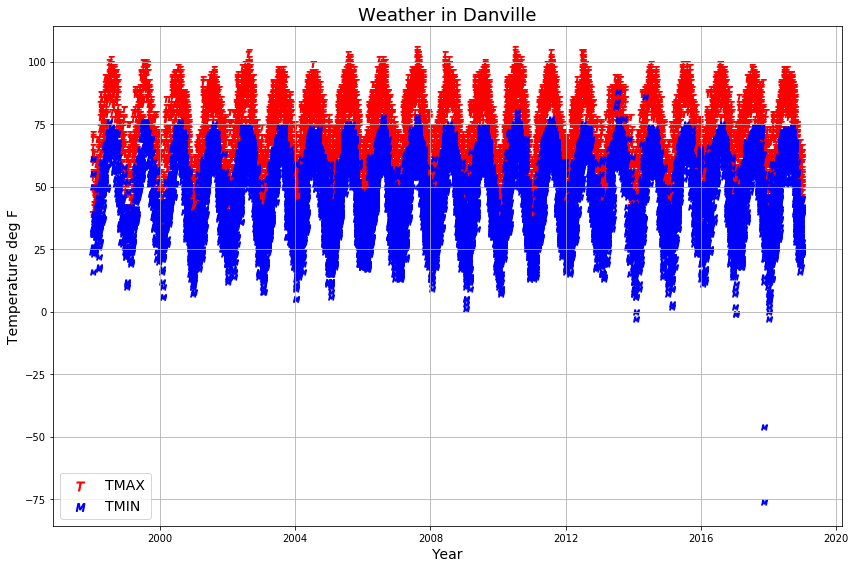

In [32]:
# Initialize the plotting parameters for the graph

plt.figure(figsize=(12,8))
plt.title('Weather in Danville', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Temperature deg F', fontsize=14)
plt.grid()

# # Make our own markers using first letter of each drug
# # enclosed in dollar signs to indicate a string

markers = ["$T$", "$M$", "$G$", "$R$"]
mkr = 0

colors = ['r','b','g','y']

# Compute the xvalues and yvalues as (timeindex, column values by column name)

#print(xval)

colnames = df2_reduced.columns[10:12]

print(f"{colnames}")

for a in colnames:
    x_values = dtg2_reduced
    y_values = df2_reduced[a]
    print(f"y_values max is: {y_values.max()}")
#     plt.scatter(x_values, y_values, c="b", alpha=0.5, marker='o')
    plt.scatter(x_values, y_values,
                 marker = markers[mkr], color=colors[mkr])
    mkr = mkr + 1

# plt.scatter(dtg2_reduced, df2_reduced.TAVG, marker='o', color='g')
leg = plt.legend(colnames, markerscale=1.5, fontsize=14) 


# Save the Figure
plt.tight_layout()
plt.savefig("./temp_Danville.pdf")

plt.show()

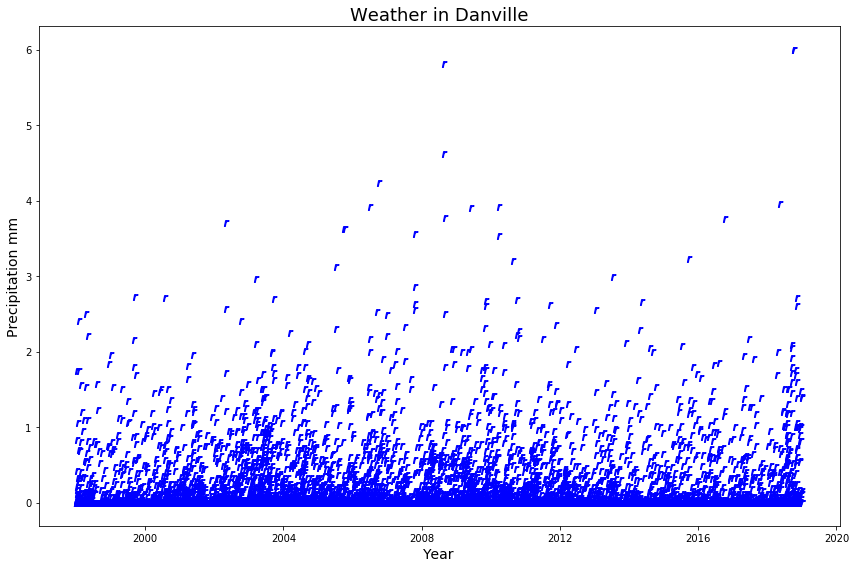

In [33]:
# Plot precip and wind speed to evaluate coverage and scale
# Initialize the plotting parameters for the graph

plt.figure(figsize=(12,8))
plt.title('Weather in Danville', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Precipitation mm', fontsize=14)
plt.scatter(dtg2_reduced, df2_reduced.PRCP, marker='$r$', color='b')
plt.tight_layout()

plt.savefig('./rain_Danville.pdf')
plt.show()


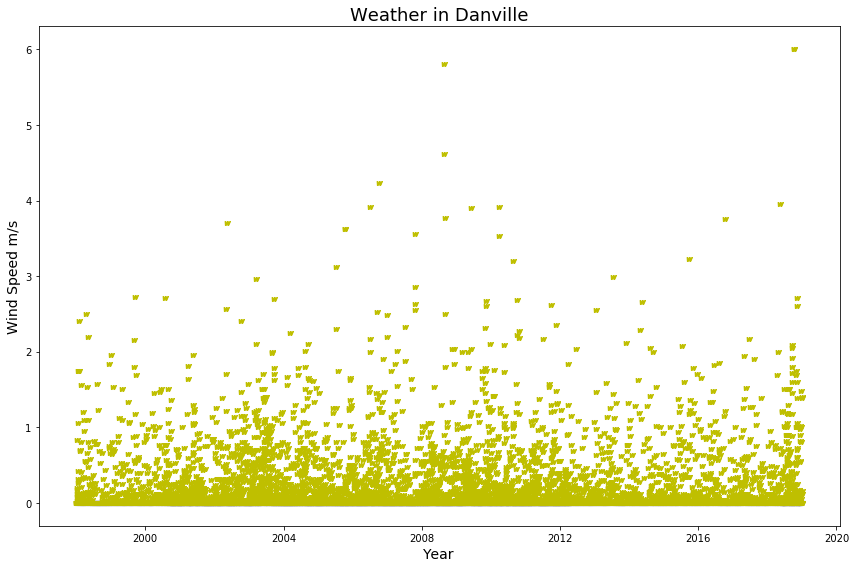

In [34]:
# Plot precip and wind speed to evaluate coverage and scale
# Initialize the plotting parameters for the graph

plt.figure(figsize=(12,8))
plt.title('Weather in Danville', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Wind Speed m/s', fontsize=14)
plt.scatter(dtg2_reduced, df2_reduced.PRCP, marker='$w$', color='y')
plt.tight_layout()

plt.savefig('./wind_Danville.pdf')
plt.show()


In [35]:
# How many unique locations are there for the weather stations after reducing for complete records?
stns = df2_reduced.NAME.unique()
lats = df2_reduced.LATITUDE.unique()
lons = df2_reduced.LONGITUDE.unique()
print(f"Name and location of individual weather stations in the set: \n {stns}  {lats}  {lons} ")

d = {'station': stns, 'lat': lats, 'lon': lons}
stations_df = pd.DataFrame(data=d)
stations_df

Name and location of individual weather stations in the set: 
 ['DANVILLE REGIONAL AIRPORT, VA US' 'DANVILLE 2 SE, VA US'
 'CASWELL GAME LANDS N. CAROLINA, NC US']  [36.5729  36.56269 36.3856 ]  [-79.3351  -79.36331 -79.2919 ] 


,station,lat,lon
0,"DANVILLE REGIONAL AIRPORT, VA US",36.57290,-79.33510
1,"DANVILLE 2 SE, VA US",36.56269,-79.36331
2,"CASWELL GAME LANDS N. CAROLINA, NC US",36.38560,-79.29190


In [36]:
# We want to group the measurements by date and average the measurements for each day and location.
df2_groupbydate = df2_reduced.groupby("DATE").mean()
df2grp = pd.DataFrame(df2_groupbydate)
df2dtg= pd.to_datetime(df2grp.index) 
df2grp.head(20)

,LATITUDE,LONGITUDE,ELEVATION,AWND,DAPR,MDPR,PRCP,TAVG,TMAX,TMIN,TOBS
DATE,,,,,,,,,,,
1998-01-01,36.56269,-79.36331,119.5,NaN,NaN,NaN,0.00,31.5,39.0,24.0,17.0
1998-01-02,36.56269,-79.36331,119.5,NaN,NaN,NaN,0.00,27.0,38.0,16.0,27.0
1998-01-03,36.56269,-79.36331,119.5,NaN,NaN,NaN,0.00,40.0,55.0,25.0,27.0
1998-01-04,36.56269,-79.36331,119.5,NaN,NaN,NaN,0.00,43.5,61.0,26.0,33.0
1998-01-05,36.56269,-79.36331,119.5,NaN,NaN,NaN,0.00,49.0,66.0,32.0,35.0
1998-01-06,36.56269,-79.36331,119.5,NaN,NaN,NaN,0.02,52.0,71.0,33.0,52.0
1998-01-07,36.56269,-79.36331,119.5,NaN,NaN,NaN,0.17,57.0,64.0,50.0,62.0
1998-01-08,36.56269,-79.36331,119.5,NaN,NaN,NaN,0.83,65.5,70.0,61.0,69.0
1998-01-09,36.56269,-79.36331,119.5,NaN,NaN,NaN,0.20,62.0,69.0,55.0,55.0


In [38]:
print(len(df2grp))

7668


Index(['TMAX', 'TMIN'], dtype='object')
y_values max is: 104.0
y_values max is: 79.0


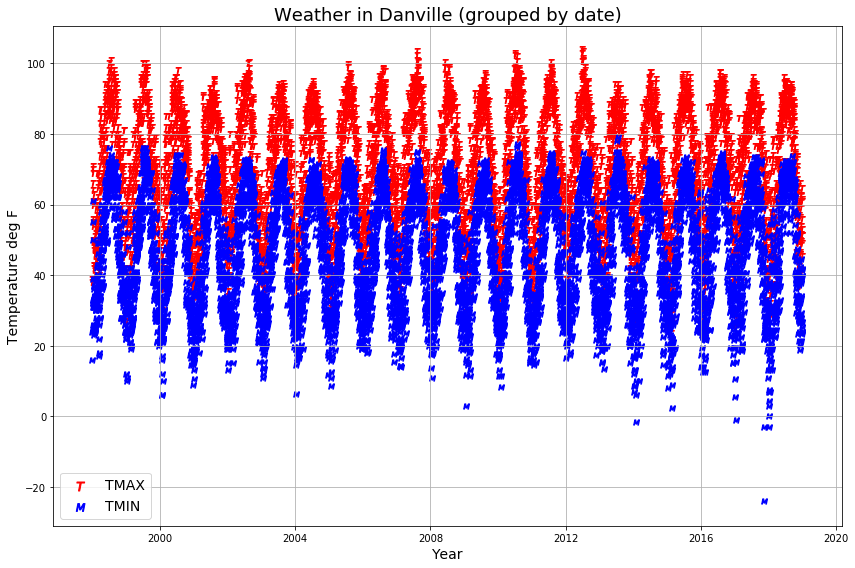

In [39]:
plt.figure(figsize=(12,8))
plt.title('Weather in Danville (grouped by date)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Temperature deg F', fontsize=14)
plt.grid()

# # Make our own markers using first letter of each drug
# # enclosed in dollar signs to indicate a string

markers = ["$T$", "$M$", "$G$", "$R$"]
mkr = 0

colors = ['r','b','g','y']

# Compute the xvalues and yvalues as (timeindex, column values by column name)

#print(xval)

colnames = df2grp.columns[8:10]

print(f"{colnames}")

for a in colnames:
    x_values = df2dtg
    y_values = df2grp[a]
    print(f"y_values max is: {y_values.max()}")
#     plt.scatter(x_values, y_values, c="b", alpha=0.5, marker='o')
    plt.scatter(x_values, y_values,
                 marker = markers[mkr], color=colors[mkr])
    mkr = mkr + 1

# plt.scatter(dtg2_reduced, df2_reduced.TAVG, marker='o', color='g')
leg = plt.legend(colnames, markerscale=1.5, fontsize=14) 


# Save the Figure
plt.tight_layout()
plt.savefig("./wxgroup_Danville.pdf")

plt.show()

In [40]:
# Dependencies and Setup

import gmaps

# Google developer API key
from api_keys import api_key

gmaps.configure(api_key)

In [41]:
# Plot stations on a map to see distribution and locations to show the small sample size
    
figure_layout = {
    
    'width': '800px',
    'height': '600px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

fig = gmaps.figure(layout=figure_layout)

locations = stations_df[["lat", "lon"]]

stations_layer = gmaps.symbol_layer(
    locations, fill_color="yellow", stroke_color="yellow", scale=5 )

fig.add_layer(stations_layer)
fig

Figure(layout=FigureLayout(border='1px solid black', height='600px', margin='0 auto 0 auto', padding='1px', wi…

###  Now need to merge the "features" with the "target" on common dates
Use the shortest dataframe as the basis, since all cells must be filled in order to use sklearn ML routines

In [42]:
# First merge the pollen and weather files on Date
first_merge = pd.merge(df_1998, df2grp, left_index=True, right_index=True, how='inner')
first_merge.head()

,Tree,Mold,Grass,Ragweed,total-pol,LATITUDE,LONGITUDE,ELEVATION,AWND,DAPR,MDPR,PRCP,TAVG,TMAX,TMIN,TOBS
1998-02-20,46.0,180.0,0.0,0.0,46.0,36.56269,-79.36331,119.5,NaN,NaN,NaN,0.00,50.0,60.0,40.0,43.0
1998-02-24,5.0,450.0,0.0,0.0,5.0,36.56269,-79.36331,119.5,NaN,NaN,NaN,0.41,42.0,44.0,40.0,44.0
1998-02-25,18.0,210.0,0.0,0.0,18.0,36.56269,-79.36331,119.5,NaN,NaN,NaN,0.00,48.5,57.0,40.0,45.0
1998-02-26,124.0,960.0,0.0,0.0,124.0,36.56269,-79.36331,119.5,NaN,NaN,NaN,0.00,49.5,65.0,34.0,34.0
1998-02-27,504.0,1260.0,0.0,0.0,504.0,36.56269,-79.36331,119.5,NaN,NaN,NaN,0.01,51.0,69.0,33.0,43.0


In [43]:
print(len(first_merge))

3564


### Ta-Da!!  The final merged file that can be used in the Ml NN routines.

In [44]:
pollen_wx_Danville_df = first_merge

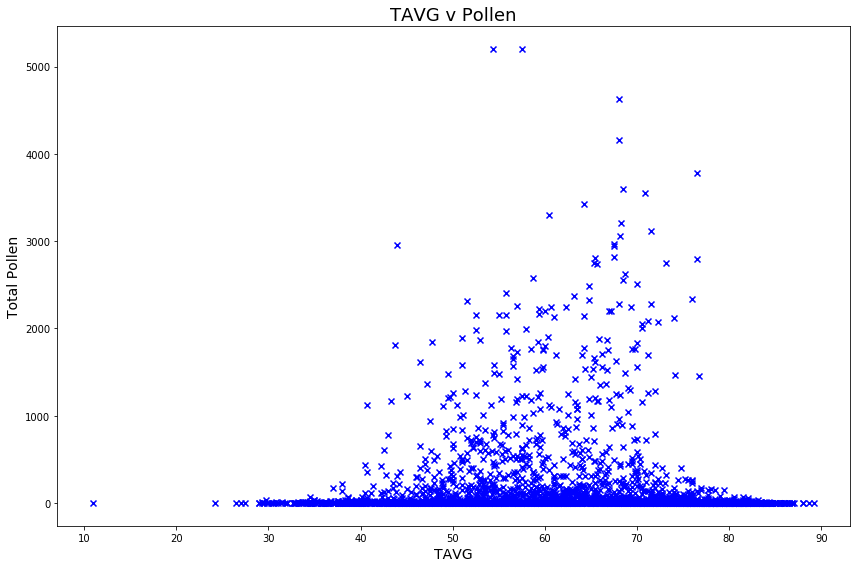

In [46]:


plt.figure(figsize=(12,8))
plt.title('TAVG v Pollen', fontsize=18)
plt.xlabel('TAVG', fontsize=14)
plt.ylabel('Total Pollen', fontsize=14)

# spi_neg = df3[df3 <0]
# dtgn = pd.to_datetime(df3_neg.index)
# df3_pos = df3[df3 >= 0]
# dtgp = pd.to_datetime(df3_pos.index)
xval = pollen_wx_Danville_df.TAVG
yval = pollen_wx_Danville_df["total-pol"]

plt.scatter(xval,yval, marker='x', c='b')
plt.tight_layout()

#plt.savefig('./wind.pdf')
plt.show()


In [47]:
#  Write the combined file to another CSV to use in the ML notebook.

pollen_wx_Danville_df.to_csv("./pollen_wx_Danville.csv")
